# Точные методы решения СЛАУ

### Постановка задачи:
Пусть известны матрица вещественных чисел $A\in \rm I\!R ^{n*n}$ и вектор правой части $f\in \rm I\!R^n$ уравнения:
$$Ax = f,$$
Требуется найти вектор $x \in \rm I\!R^n$, из этого уравнения.


###### Для каждого из методов время решения будем сравнивать с временем вычислений соответствующих библиотечных функций, а сами решения будем сравнивать с помощью функции *numpy.linalg.norm()*. 

###### Матрица и правая часть уравнения генерируются  случайным образом. Для гарантии того, что матрица имеет диагональное преобладание в каждом методе будем пропускать матрицу через функцию *diag_major* (описание в коде).

#  




# Метод Гаусса

Пусть $A=LU$, где $L-$ нижнетреугольная матрица, $U-$ верхнетрегольная матрица с единицами на главной диагонали:
$$LUx=f.$$


**Прямой ход**: привести матрицу к улучшенному верхнетреугольному виду элементарнымипреобразованиями строк.
$$Ux = L^{-1}f.$$
**Обратный ход**: привести матрицу кк диагональному виду элементарными преобразованиями строк.
$$x = U^{-1}L^{-1}f.$$

### Асимптотика алгоритмической сложности:
1. прямого хода: $\Theta(n^3);$
2. обратного хода: $\Theta(n^2);$
3. метода Гаусса : $\Theta(n^3)$.

My time:  [0.15822672843933105, 0.5739479064941406, 1.3904681205749512, 2.341061592102051, 3.7289059162139893]
lib_time:  [0.025662899017333984, 0.0018117427825927734, 0.0182340145111084, 0.009048938751220703, 0.016607999801635742]


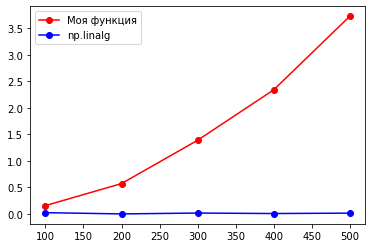

Оценим норму разности решений функции gauss и библиотечной функции: 
4.9673428657094446e-17


In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

###### Метод Гаусса ########
def gauss(A, f):
    n = f.size
    x = np.zeros(n)

    for k in range(n):
        f[k] = f[k] / A[k][k]
        A[k] = A[k] / A[k][k]
        for i in range(k + 1, n):
            f[i] = f[i] - f[k] * A[i][k]
            A[i] = A[i] - A[k] * A[i][k]
            A[i][k] = 0

    for i in range(n - 1, -1, -1):
        x[i] = f[i]
        for j in range(i + 1, n):
            x[i] = x[i] - A[i][j] * x[j]

    return x


    
##### Превращение матрицы в матрицу с диагональным преобладанием
def diag_major(A):
    n = A.shape[0]
    for i in range(n):      # Делаем диагональный элемент уж точно больше суммы
        sum = 0                                          #  всех в строке
        for j in range(n):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum
    

########## Проверка метода Гаусса ###############
def check_gauss():
    n = 5      # n * 100 - максимальный порядок матриц
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        A = np.random.rand(100 * (i+1), 100 * (i+1))
        f = np.random.rand(100 * (i+1))

        diag_major(A) # диагональное преобладание

        start_time = time.time()   # библиотечный метод
        np_x = np.linalg.solve(A, f)
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()   # "мой" метод
        my_x = gauss(A, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='np.linalg')
    plt.legend()

    plt.show()
    
    print('Оценим норму разности решений функции gauss и библиотечной функции: ')
    err = np.linalg.norm(np_x-my_x)
    print(err)
    
check_gauss()





# Метод Холецкого


Пусть $A = A^T$ и $A > 0$. Тогда $$A = S^TS,$$где $S-$ верхнетреугольная матрица.
В этом случае нам необходимо решить два уравнения:
$\quad$ $S^Ty=f$, $\quad$ $Sx=y.$

My time:  [0.5362229347229004, 4.251189947128296, 13.98434066772461]
lib_time:  [0.23608160018920898, 0.002998828887939453, 0.01108694076538086]


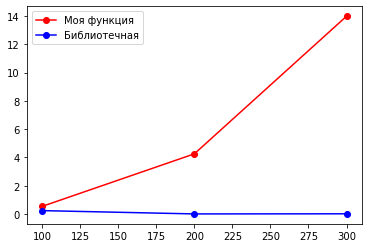

Оценим норму разности решений описанного метода и библиотечной функции: 
0.013933458674467892


In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

# Метод Холецкого решения СЛАУ
def cholecky(A, f):
    n = A.shape[0]
    U = np.zeros((n, n))

    for i in range(n):

                       # На данном этапе создаем матрицу U
        sum = 0        # которая определяется из формулы A = U(transp) * U
        for k in range(i):
            sum += U[k][i] ** 2
        U[i][i] = (A[i][i] - sum) ** 0.5

        for j in range(i+1, n):
            sum = 0
            for k in range(i):
                sum += U[k][i] * U[k][j]
            U[i][j] = (A[i][j] - sum) / U[i][i]
            
                        # Остается решить прямой метод
                        # И обратный
            
    # U(transp) * y = f
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i):
            sum += U[k][i] * y[k]
        y[i] = (f[i] - sum) / U[i][i]
        
    # U * x = y
    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i+1, n):
            sum += U[i][k] * x[k]
        x[i] = (y[i] - sum) / U[i][i]
        
    return x




##### Превращение матрицы в матрицу с диагональным преобладанием
def diag_major(A):
    n = A.shape[0]
    for i in range(n):      # Делаем диагональный элемент уж точно больше суммы
        sum = 0                                          #  всех в строке
        for j in range(n):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum
    


def check_cholecky():
    n = 3      # n * 100 - максимальный порядок матриц
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        A = np.random.rand(100 * (i+1), 100 * (i+1))
        f = np.random.rand(100 * (i+1))

        diag_major(A) # диагональное преобладание

        start_time = time.time()   # библиотечный метод
        U = np.linalg.cholesky(A)
        y = solve_triangular(U, f, lower=True)
        U = np.transpose(U)
        lib_x = solve_triangular(U, y, lower=False)
        end_time = time.time()
        lib_time[i] = end_time - start_time
    
        start_time = time.time()   # "мой" метод
        my_x = cholecky(A, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='Библиотечная')
    plt.legend()

    plt.show()
    
    print('Оценим норму разности решений описанного метода и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)

check_cholecky()

# верхне-треугольную матрицу строит долго, поэтому ограничимся порядками 100, 200, 300


# Метод прогонки (3х диагональной матрицы)
Пусть матрица $A$ имеет диагональное преобладание и везде нулевые элементы, за исключением, возможно, элементов главной диагонали и двух соседних. Тогда нет необходимости хранить в памяти и обходить всю матрицу $A$. Работать будем лишь с данными тремя ненулевыми диагоналями, или векторами.

Решение уравнения $Ax=f$ сводится к последовательным решениям прямого и обратного хода. В прямом ходе вычисляются коэффициенты матричной прогонки, а в обратном ходе $-$ сам вектор решения $x$ по уже найденным коэффициентам. Сами коэффициенты появляются в ходе решения из того допущения, что неизвестное $x_{i-1}$ может быть линейно выражено через $x_i$: $$x_{i-1} = \alpha_i x_i + \beta_i, \quad i=1,...,n.$$
Понятно, что придется вводить некоторые фиктивные переменные, в частности, для **$x:\quad$** $x_0$ и $x_{n+1}.$ 


* Решение будем искать уже для больших порядков матриц, т.к. для данного специального вида матриц решение ищется существенно быстрее, чем например, метод Гаусса.

#### Асимптотика: $\quad \Theta(n)$


My time:  [0.0059163570404052734, 0.012253522872924805, 0.018639326095581055, 0.026859045028686523, 0.031057357788085938]
Lib time:  [0.0003542900085449219, 0.0003821849822998047, 0.0004329681396484375, 0.0005004405975341797, 0.0006744861602783203]


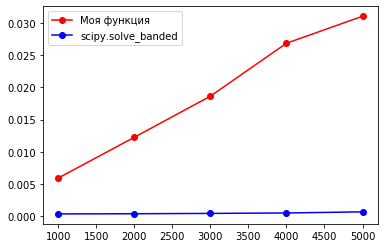

Оценим норму разности решений функции sweep и библиотечной функции: 
1.0086131241724912e-14


In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded


############ Прогонка #################
def sweep (a, b, c, f):
    n = f.size
    
    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0
    
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d
        
    x[n] = 0
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    x = x[:-1]
    return x


def diag_major(a, b, c):
    n = len(b)
    for i in range(n):
        sum = abs(a[i]) + abs(c[i])
        b[i] = abs(b[i]) + sum


############ Проверка прогонки ##############
def check_sweep():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*1000 for i in range(1, n+1)]

    for i in range(0, n):
        size = 1000 * (i+1)
        a = np.random.rand(size)   # элемент с индексом 0 пропадет
        b = np.random.rand(size)
        c = np.random.rand(size)   # элемент с индексом n-1 пропадет
        f = np.random.rand(size)
        
        diag_major(a, b, c)   # матрица теперь с диаг. преобладанием
        
        # для библиотечной solve_banded
        af = np.random.rand(3, size)
        af[0][1:] = c[:-1]
        af[1] = b
        af[2][:-1] = a[1:]
        
        start_time = time.time()
        lib_x = solve_banded((1,1), af, f)
        end_time = time.time()
        lib_time[i] = end_time - start_time
        

        start_time = time.time()
        my_x = sweep(a, b, c, f)
        end_time = time.time()
        my_time[i] = end_time - start_time
    
    
    print('My time: ', my_time)
    print('Lib time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.solve_banded')
    plt.legend()

    plt.show()
    
    print('Оценим норму разности решений функции sweep и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)
    
    
check_sweep()